<a href="https://colab.research.google.com/github/DuarteVn/EDA_Desafio_Horus/blob/main/Desafio_pratico_horus_Vinicius_Duarte.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
#@title # Desafio Prático - Processo Seletivo Ciência de Dados
#@markdown ### 1. Importação de bibliotecas e leitura do dataset
#@markdown ---
#@markdown Primeiro, foi instalado as bibliotecas necessárias e depois todos os módulos que serão utilizados no desafio.

# 1.1 Libs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# 1.2 Config visuais
pd.set_option('display.float_format', lambda x: f'{x:.2f}')
plt.style.use('seaborn-v0_8')
sns.set_palette('pastel')

# 1.3 Upload manual xlsx
from google.colab import files
uploaded = files.upload()

# 1.4 Leitura do arquivo Excel
arquivo = list(uploaded.keys())[0]
df = pd.read_excel(arquivo, sheet_name='Planilha1')

# Ver primeiras linhas
df.head()

Saving dados_desafio.xlsx to dados_desafio (1).xlsx


,id_pedido,tipo_pagamento,prestacoes,valor_pagamento,id_cliente,status_pedido,data_hora_pedido,pedido_aprovado,pedido_com_entregador,pedido_entregue,...,comprimento_produto,altura_produto,largura_produto,cep_vendedor,cidade_vendedor,estado_vendedor,id_unica_cliente,cep_cliente,cidade_cliente,estado_cliente
0,05d5a67b06f86425711075939a164657,credit_card,1,18.38,716c95338343be76a421f05145f6d9b7,delivered,2017-10-24 09:17:09.000,2017-10-24 09:28:15.000,2017-10-25 22:45:59.000,2017-10-26 14:13:59.000,...,16.00,7.00,12.00,4870,sao paulo,SP,b4acaca510f847f9927914b51f9b0874,9861,sao bernardo do campo,SP
1,b1f9820e61b6a6a7643c961eaf4f217d,credit_card,1,28.23,6e550daa4d9d07414a598ee4682289a0,delivered,2018-04-09 18:06:35.971,2018-04-09 18:31:35.962,2018-04-10 19:24:56.995,2018-04-16 18:05:41.971,...,20.00,15.00,15.00,6716,cotia,SP,9abf4d8d20ca191ce59eb6227cf53d6d,38270,campina verde,MG
2,b27f6a3ed9bfe29879c912b10bcf081b,credit_card,9,92.57,dd774d127953e12f6953a9d36e6a3cc4,delivered,2018-01-02 20:32:35.981,2018-01-02 20:50:16.022,2018-01-08 12:32:48.019,2018-01-16 20:52:39.014,...,60.00,20.00,30.00,13232,campo limpo paulista,SP,dc446a1ea0c8cc3eb1cd31896f6cf00f,12919,braganca paulista,SP
3,a182c021b0561e70031de925b3991fb3,credit_card,4,176.99,1d93c38087f43927ad29cdbd73a1a01b,delivered,2018-04-02 20:25:56.035,2018-04-02 20:35:17.030,2018-04-04 18:13:12.029,2018-04-11 11:14:30.970,...,17.00,11.00,16.00,14840,guariba,SP,14691264ea396cd3bd71ebbe36bc6771,29278,arace,ES
4,8e76f4ac6aee1d6013e40279de68a7cf,credit_card,10,110.56,e085989aa21e36b90469d6940aefe23c,delivered,2017-08-05 17:52:44.026,2017-08-05 18:10:09.034,2017-08-07 17:39:02.966,2017-08-15 19:59:47.962,...,50.00,7.00,33.00,14940,ibitinga,SP,06c211500493e0aa2c584346c15a1d81,95770,feliz,RS


In [21]:
#@markdown # 2. Exploração Inicial dos Dados
#@markdown ---
#@markdown Nesta célula, é possível verificar o número total de registros, colunas,
#@markdown os tipos de dados presentes e também a existência de valores nulos/ausentes.

#@markdown Pode-se visualizar também algumas colunas-chave como `data_avaliacao`, `data_resposta_avaliacao`, `pedido_entregue`, `categoria_produto`
#@markdown e `pedido_com_entregador` apresentam maior quanditade de valores ausentes.

#@markdown Esses nulos de eventos não realizados (ex: cliente não avaliou, pedido não entregue),
#@markdown sugerem situações reais do negócio e não um erro de coleta

df_info = pd.DataFrame({
    'Tipo de Dado': df.dtypes,
    'Valores Nulos': df.isnull().sum(),
    'Percentual Nulo (%)': (df.isnull().sum() / df.shape[0] * 100).round(2)
}).sort_values(by='Valores Nulos', ascending=False)

df_info.head(31)


,Tipo de Dado,Valores Nulos,Percentual Nulo (%)
data_avaliacao,datetime64[ns],4632,4.12
data_resposta_avaliacao,datetime64[ns],4632,4.12
pedido_entregue,datetime64[ns],2363,2.10
categoria_produto,object,1620,1.44
pedido_com_entregador,datetime64[ns],1180,1.05
comprimento_produto,float64,18,0.02
altura_produto,float64,18,0.02
peso_produto,float64,18,0.02
largura_produto,float64,18,0.02
pedido_aprovado,datetime64[ns],15,0.01


In [22]:
#@markdown # 3. Conversão de colunas de datas
#@markdown ---
#@markdown Foi realizada a conversão das colunas com informações temporais para o formato datetime (boas práticas),
#@markdown o que nos permitiu calcular durações, filtrar por períodos e extrair informações temporais.

#@markdown `errors='coerce'` evita erro em valores inválidos
colunas_datas = [
    'data_hora_pedido', 'pedido_aprovado', 'pedido_com_entregador',
    'pedido_entregue', 'data_avaliacao', 'data_resposta_avaliacao'
]

for col in colunas_datas:
    df[col] = pd.to_datetime(df[col], errors='coerce')

df[colunas_datas].head()


,data_hora_pedido,pedido_aprovado,pedido_com_entregador,pedido_entregue,data_avaliacao,data_resposta_avaliacao
0,2017-10-24 09:17:09.000,2017-10-24 09:28:15.000,2017-10-25 22:45:59.000,2017-10-26 14:13:59.000,2017-10-27,2017-10-27 17:13:20.000
1,2018-04-09 18:06:35.971,2018-04-09 18:31:35.962,2018-04-10 19:24:56.995,2018-04-16 18:05:41.971,2018-04-17,2018-04-18 12:46:56.986
2,2018-01-02 20:32:35.981,2018-01-02 20:50:16.022,2018-01-08 12:32:48.019,2018-01-16 20:52:39.014,2018-01-17,2018-01-22 10:00:16.963
3,2018-04-02 20:25:56.035,2018-04-02 20:35:17.030,2018-04-04 18:13:12.029,2018-04-11 11:14:30.970,2018-04-12,2018-04-16 12:09:10.022
4,2017-08-05 17:52:44.026,2017-08-05 18:10:09.034,2017-08-07 17:39:02.966,2017-08-15 19:59:47.962,2017-08-16,2017-08-17 00:34:48.979


In [23]:
#@markdown # 4. Criação de colunas derivadas de tempo
#@markdown ---
#@markdown Com as datas convertidas, criou-se métricas derivadas importantes:
#@markdown - `tempo_entrega`: tempo total desde o pedido até a entrega
#@markdown - `tempo_aprovacao`: tempo até a aprovação do pedido
#@markdown - `tempo_envio`: tempo entre aprovação e saída do pedido com o entregador

df['tempo_entrega'] = (df['pedido_entregue'] - df['data_hora_pedido']).dt.days
df['tempo_aprovacao'] = (df['pedido_aprovado'] - df['data_hora_pedido']).dt.total_seconds() / 3600
df['tempo_envio'] = (df['pedido_com_entregador'] - df['pedido_aprovado']).dt.total_seconds() / 3600

df[['tempo_aprovacao', 'tempo_envio', 'tempo_entrega']].describe()


,tempo_aprovacao,tempo_envio,tempo_entrega
count,112477.00,111297.00,110129.00
mean,10.51,68.33,11.99
std,22.32,85.90,9.42
min,0.00,-4109.26,0.00
25%,0.22,21.22,6.00
50%,0.35,44.19,10.00
75%,14.99,87.27,15.00
max,1450.87,3018.30,208.00


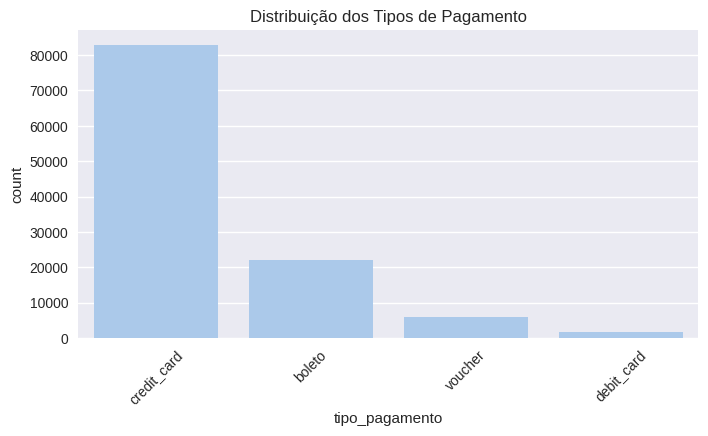

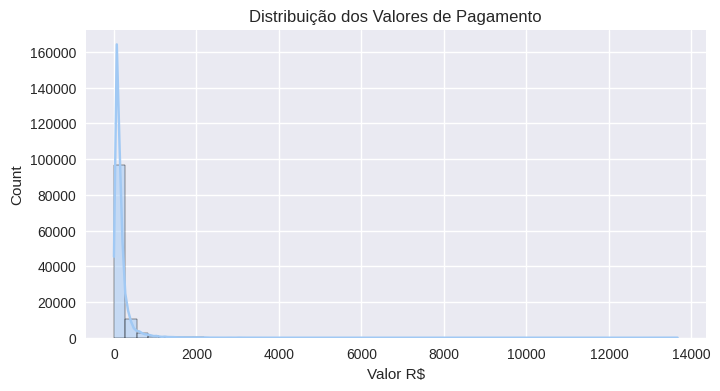

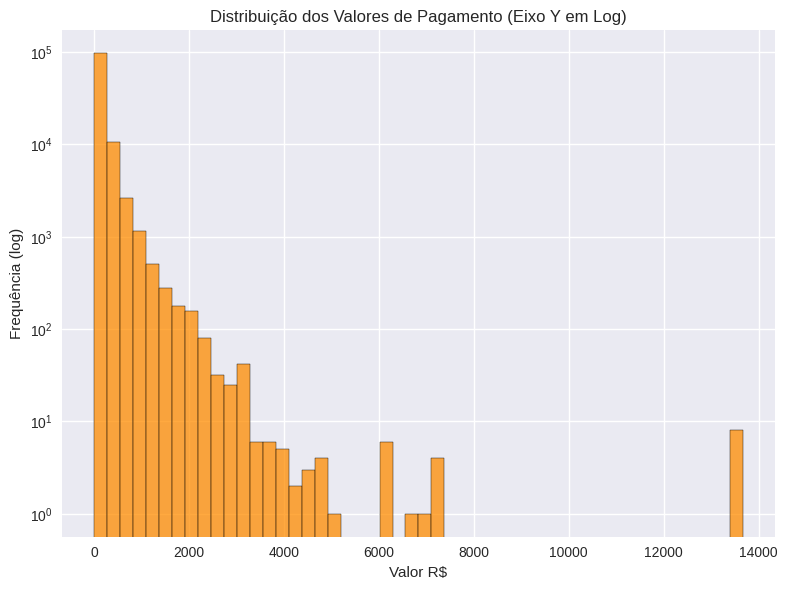

In [34]:
#@markdown # 5. Visualização inicial dos dados
#@markdown ---
#@markdown Aqui começamos a explorar visualmente os dados:
#@markdown - Distribuição dos tipos de pagamento
#@markdown - Distribuição dos valores de pagamento

#@markdown ### 1. Predominância do Cartão de Crétido
#@markdown ### 2. Distribuição enviesada à direita:
#@markdown  - A maior parte dos pagamentos se concentra em valores abaixo de 2.000,00 enquanto poucos registros
#@markdown apresentam valores altos se estendendo até R$13.500,00

#@markdown - Esse tipo de visualização permite compreender o perfil de compra do público, planejar ações com
#@markdown base nos valores típicos de pagamento
plt.figure(figsize=(8,4))
sns.countplot(data=df, x='tipo_pagamento', order=df['tipo_pagamento'].value_counts().index)
plt.title('Distribuição dos Tipos de Pagamento')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(8,4))
sns.histplot(df['valor_pagamento'], bins=50, kde=True)
plt.title('Distribuição dos Valores de Pagamento')
plt.xlabel('Valor R$')
plt.show()


plt.figure(figsize=(8, 6))
# Histograma com escala log
sns.histplot(df['valor_pagamento'], bins=50, kde=False, color='darkorange')
plt.title('Distribuição dos Valores de Pagamento (Eixo Y em Log)')
plt.yscale('log')
plt.xlabel('Valor R$')
plt.ylabel('Frequência (log)')

plt.tight_layout()
plt.show()

/tmp/ipython-input-3662234820.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=pedidos_por_cidade.index, y=pedidos_por_cidade.values, palette='Blues_d')


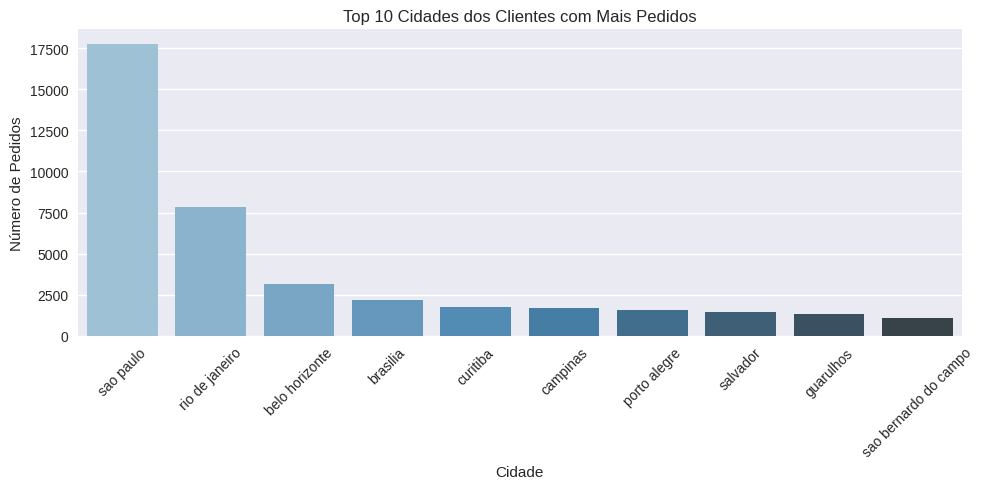

/tmp/ipython-input-3662234820.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=pedidos_por_estado_vendedor.index, y=pedidos_por_estado_vendedor.values, palette='Purples_d')


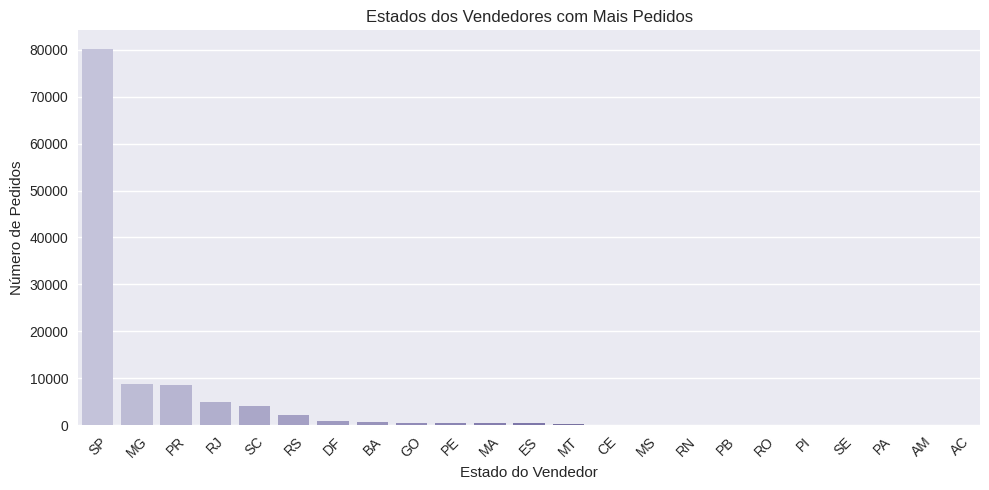

In [38]:
#@markdown # 6. Cidades dos clientes e estados dos vendedores com mais pedidos
#@markdown ---
#@markdown ## Top 10 cidades com mais pedidos (clientes):
#@markdown - São Paulo lidera com o número de pedidos feitos por clientes;
#@markdown - Rio de Janeiro em segundo lugar, com menos da medade do volume de SP;
#@markdown - Capitais com Belo Horizonte, Brasília, Campinas e Salvador indica um forte consumo nas grandes capitais e centros urbanos;

#@markdown A maior parte dos clientes se concentra nas regiões Sudeste e Sul. Pode ser interessante
#@markdown explorar incentivos comerciais nessas regiões, campanhas de marketing, logística e distribuição.

#@markdown ## Estados com mais pedidos (vendedores)
#@markdown - São Paulo é o principal polo de vendedores com o volume extremamente superior aos demais;
#@markdown - Outros estados relevantes: Minas Gerais, Paraná, Rio de Janeiro e Santa Catarina;

#@markdown Existe uma centralização das operações comerciais em SP, pode indicar melhores estruturas, lógisticas, incentivos
#@markdown fiscais e etc, porém, pode representar risco operacional, caso surjam problemas locais. Pode ser estratégico incentivar
#@markdown a captação de vendedorese em oturas regiões para descentralizar

# Cidades com mais pedidos (origem dos clientes)
pedidos_por_cidade = df['cidade_cliente'].value_counts().head(10)

# Estados dos vendedores com mais pedidos
pedidos_por_estado_vendedor = df['estado_vendedor'].value_counts()

# Gráfico - Top 10 cidades com mais pedidos
plt.figure(figsize=(10, 5))
sns.barplot(x=pedidos_por_cidade.index, y=pedidos_por_cidade.values, palette='Blues_d')
plt.title('Top 10 Cidades dos Clientes com Mais Pedidos')
plt.xlabel('Cidade')
plt.ylabel('Número de Pedidos')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Gráfico - Estados dos vendedores com mais pedidos
plt.figure(figsize=(10, 5))
sns.barplot(x=pedidos_por_estado_vendedor.index, y=pedidos_por_estado_vendedor.values, palette='Purples_d')
plt.title('Estados dos Vendedores com Mais Pedidos')
plt.xlabel('Estado do Vendedor')
plt.ylabel('Número de Pedidos')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()